# **Project for 2024 Programming for Data Analytics (PFDA) module.**

## Imported libraries & modules:

### [Pandas](https://pandas.pydata.org/) for data frames:
A fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 
### [Matplotlib](https://matplotlib.org/stable/) for plotting:
A comprehensive library for creating static, animated, and interactive visualizations.
### [Seaborn](https://seaborn.pydata.org/)
seaborn: statistical data visualization

In [2]:
# Data frames.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data set.
file_path = r"C:\Users\User\Desktop\ATU\PFDA\Project\mly5427.csv"
df = pd.read_csv(file_path, on_bad_lines='skip')

df

,Station Name: OUGHTERARD GOLF CLUB
0,Station Height: 17 M
1,year: - Year
2,month: - Month
3,rain: - Precipitation Amount (mm)
4,gdf: - Greatest daily fall (mm)
5,rd: - Number of rain days (0.2mm or more)
6,wd: - Number of wet days (1.0 mm or more)\t
7,ind: - Indicator


In [3]:
df = pd.read_csv(file_path, skiprows=13)

df

,year,month,ind,rain,gdf,rd,wd
0,2009,9,0,61.7,25.5,11,10
1,2009,10,0,129.4,,18,15
2,2009,11,1,365.7,48.2,28,27
3,2009,12,0,119.1,19.2,17,15
4,2010,1,0,67.0,11.0,13,12
...,...,...,...,...,...,...,...
173,2024,3,0,170.8,29.4,22,20
174,2024,4,0,151.7,24.8,19,18
175,2024,5,0,65.8,11.0,11,10
176,2024,6,0,55.3,14.6,13,12


The data frames starts in September 2009 so I decided to remove those rows as well 2024 to only have complete years to work with:

In [4]:
df = df[~df['year'].isin([2009, 2024])]

df

,year,month,ind,rain,gdf,rd,wd
4,2010,1,0,67.0,11.0,13,12
5,2010,2,0,34.8,12.5,10,9
6,2010,3,0,78.2,18.6,15,14
7,2010,4,0,110.6,35.8,12,11
8,2010,5,0,37.6,8.9,13,9
...,...,...,...,...,...,...,...
166,2023,8,0,151.8,37.5,16,15
167,2023,9,0,145.4,26.2,16,15
168,2023,10,0,207.7,31.0,24,21
169,2023,11,0,146.4,29.7,21,21


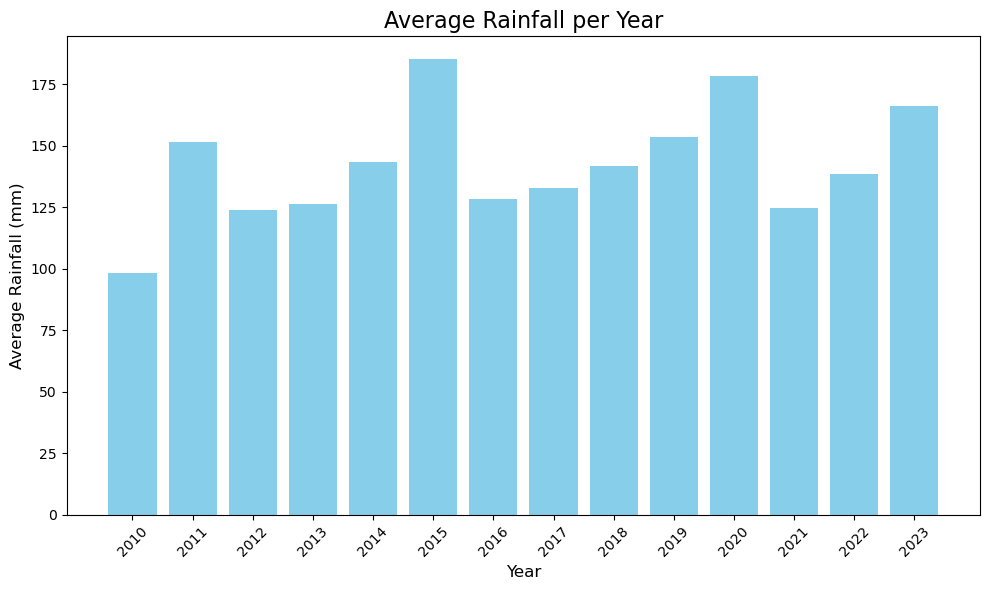

In [5]:
# Group by year and calculate average rainfall.
avg_rainfall_per_year = df.groupby('year')['rain'].mean().reset_index()

# Plot the bar chart for all years.
plt.figure(figsize=(10, 6))  # Set the figure size.
plt.bar(avg_rainfall_per_year['year'], avg_rainfall_per_year['rain'], color='skyblue')

# Title and labels.
plt.title('Average Rainfall per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)
plt.xticks(avg_rainfall_per_year['year'], rotation=45)  # Rotate x-axis labels for better readability.

# Plot.
plt.tight_layout()
plt.show()

In [6]:
# Load the CSV file from the URL.
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# Skipping initial rows to directly access data & adding 'low_memory=False' afer it was suggested by output.
df = pd.read_csv(url, skiprows=23, low_memory=False)
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248389,30-nov-2024 20:00,0,0.0,0,11.6,0,10.9,10.3,12.5,91,...,2,17,2,200,,,0.0,,0,8
248390,30-nov-2024 21:00,0,0.0,0,11.4,0,10.7,10.0,12.3,91,...,2,16,2,200,,,0.0,,0,8
248391,30-nov-2024 22:00,0,0.0,0,10.9,0,10.3,9.7,12.0,92,...,2,15,2,210,,,0.0,,0,8
248392,30-nov-2024 23:00,0,0.0,0,10.8,0,10.3,9.9,12.1,94,...,2,14,2,190,,,0.0,,0,8


C:\Users\User\AppData\Local\Temp\ipykernel_22084\1420330102.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


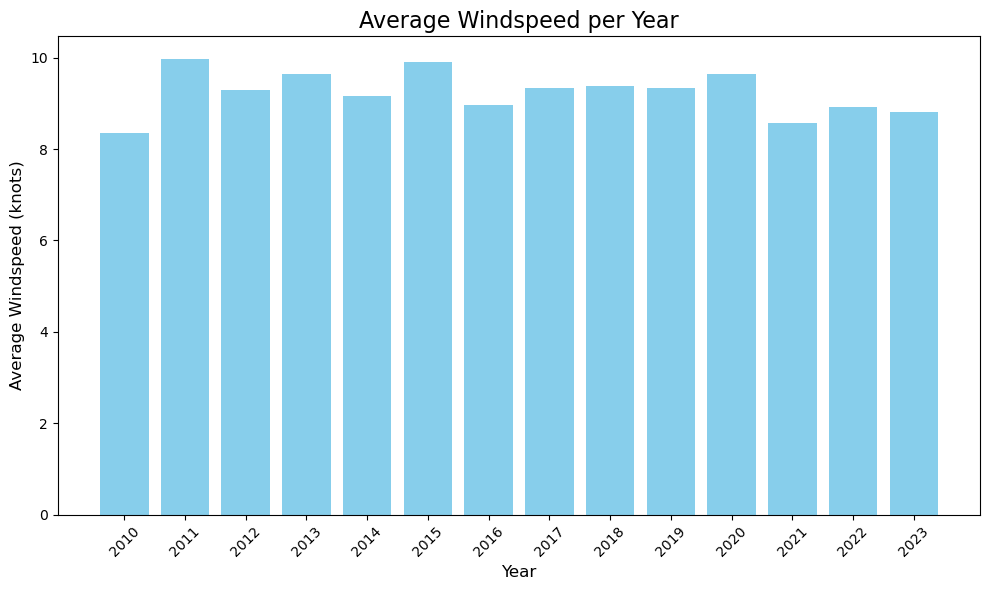

In [7]:
# Convert 'date' column to datetime format.
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert 'wdsp' column to numeric format.
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

# Extract year and day of the week from 'date'.
df['year'] = df['date'].dt.year
df['weekday'] = df['date'].dt.day_name()

# Exclude years 1996 - 2009 and 2024.
df = df[~df['year'].isin(range(1996, 2010)) & ~df['year'].isin([2024])]

# Group by year and calculate average windspeed.
avg_windspeed_per_year = df.groupby('year')['wdsp'].mean().reset_index()

# Plot the bar chart for all years.
plt.figure(figsize=(10, 6))  # Set the figure size.
plt.bar(avg_windspeed_per_year['year'], avg_windspeed_per_year['wdsp'], color='skyblue')

# Title and labels.
plt.title('Average Windspeed per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Windspeed (knots)', fontsize=12)
plt.xticks(avg_windspeed_per_year['year'], rotation=45)  # Rotate x-axis labels for better readability.

# Plot.
plt.tight_layout()
plt.show()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html